# Feature Engineering


This Dataset contains information about the "House price" . In this table we have multiple categorical and numerical features and we can look at the "Price" column as target in the predictive analysis

In this notebook, we are going to learn how to do feature engineering.

### Exploring Data

First, Let's load the data here and take a look at the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


### Combination of the Existing Features

We can start with a simple addition. We have two variables `Bedrooms` and `Bathrooms` but we don't have the total number of rooms in the house.

We can create a new feature which represents the sum of these two:

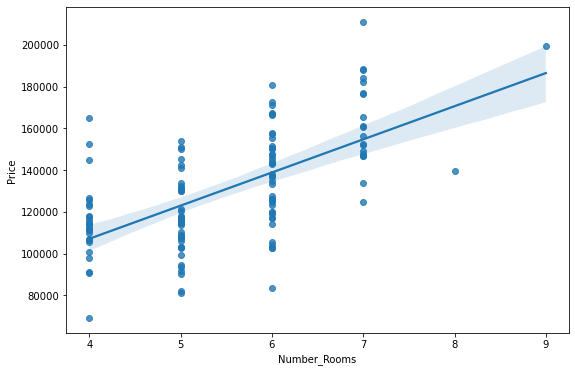

In [2]:
df['Number_Rooms'] = df['Bedrooms'] + df['Bathrooms']


f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df['Number_Rooms']), y=df['Price'], data=df, order=1);


We can see that there is a significant relationship between the new variable and our target.

> #### Excersice
> Do you have any more ideas for new features? Try to come up with some extra.


Now, we can create a dummy variables and check boxplot with each new column to see a better relationship between features and target

In [3]:
categories = df.dtypes[df.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df[categories])
df = pd.concat([df, df_dummy], axis=1)
df_final = df.drop(columns=categories)

In [4]:
df_final

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Number_Rooms,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,4,1,0,1,0,0
1,2,114200,2030,4,2,3,6,1,0,1,0,0
2,3,114800,1740,3,2,1,5,1,0,1,0,0
3,4,94700,1980,3,2,3,5,1,0,1,0,0
4,5,119800,2130,3,3,3,6,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,6,0,1,1,0,0
124,125,147900,2160,4,3,3,7,0,1,1,0,0
125,126,113500,2070,2,2,2,4,1,0,0,1,0
126,127,149900,2020,3,3,1,6,1,0,0,0,1


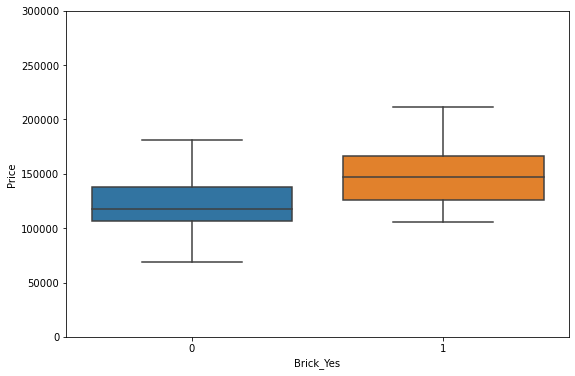

In [5]:
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x='Brick_Yes', y="Price", data=df_final)
fig.axis(ymin=0, ymax=300000);


> #### Excersice
> Let's try this on the other categorical feature

In [7]:
#Load Data
df_final.to_csv('../data/df_final.csv')